<a href="https://colab.research.google.com/github/Abhinay5465/Potato_colab/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 30


In [ ]:
%cd /content/drive/MyDrive/potato

/content/drive/MyDrive/potato


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/potato",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 1650 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names


['Potato___Early_blight-20231106T181055Z-001',
 'Potato___Late_blight-20231106T181901Z-001',
 'Potato___healthy-20231106T181828Z-001']

In [ ]:
len(dataset)

52

In [ ]:
for image_batch , label_batch in dataset.take(1):
   print(image_batch.shape)
   print(label_batch.numpy())


(32, 256, 256, 3)
[2 0 0 2 1 1 1 0 1 1 0 0 1 1 2 0 0 0 1 1 2 1 1 1 1 1 1 0 1 0 1 1]


In [ ]:
for image_batch , label_batch in dataset.take(1):
   print(image_batch[0].numpy())

[[[142. 130. 140.]
  [136. 124. 134.]
  [136. 124. 134.]
  ...
  [117. 104. 114.]
  [121. 108. 118.]
  [107.  94. 104.]]

 [[128. 116. 126.]
  [138. 126. 136.]
  [137. 125. 135.]
  ...
  [119. 106. 116.]
  [124. 111. 121.]
  [110.  97. 107.]]

 [[121. 109. 119.]
  [143. 131. 141.]
  [137. 125. 135.]
  ...
  [123. 110. 120.]
  [129. 116. 126.]
  [114. 101. 111.]]

 ...

 [[156. 146. 154.]
  [164. 154. 162.]
  [168. 158. 166.]
  ...
  [150. 140. 148.]
  [152. 142. 150.]
  [145. 135. 143.]]

 [[143. 133. 141.]
  [155. 145. 153.]
  [163. 153. 161.]
  ...
  [150. 140. 148.]
  [153. 143. 151.]
  [146. 136. 144.]]

 [[141. 131. 139.]
  [154. 144. 152.]
  [162. 152. 160.]
  ...
  [150. 140. 148.]
  [154. 144. 152.]
  [148. 138. 146.]]]


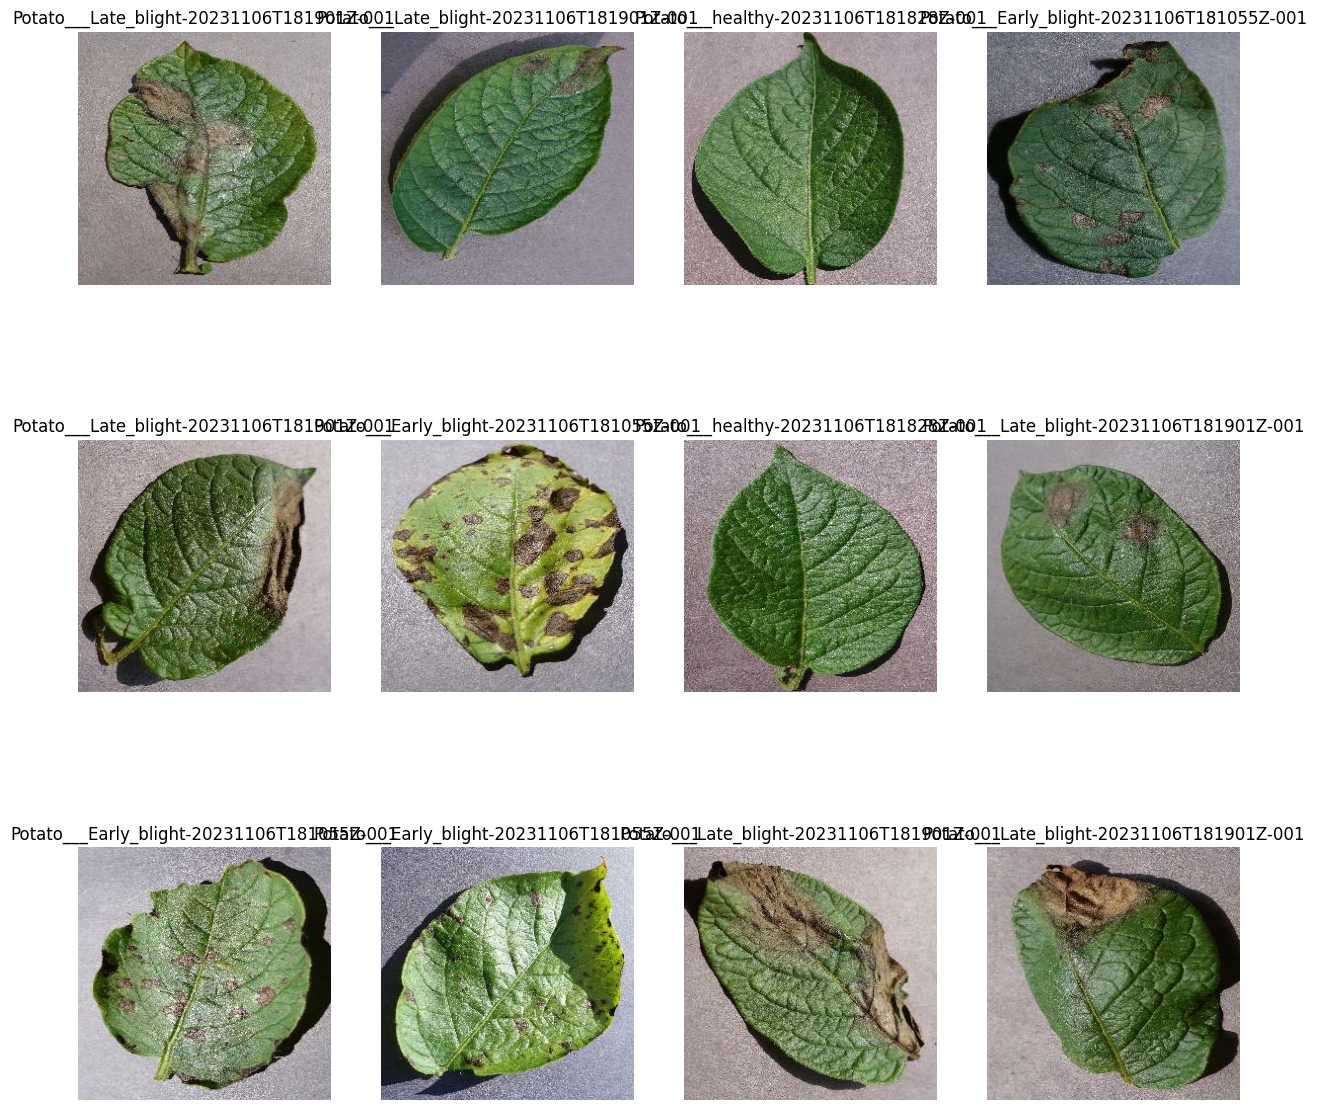

In [ ]:
plt.figure(figsize=(15,15))
for image_batch , label_batch in dataset.take(1):
  for i in range (12):
   ax =  plt.subplot(3,4,i+1)
   plt.imshow(image_batch[i].numpy().astype("uint8"))
   plt.title(class_names[label_batch[i]])
   plt.axis("off")

In [ ]:
len(dataset)

52

In [ ]:
train_size = 0.8
len(dataset)*train_size

41.6

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

52

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

0

In [ ]:
val_size = 0.1
len(dataset)*val_size


5.2

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

0

In [ ]:
def get_dataset_partitions_tf(ds , train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size = len(ds)
  if shuffle:
     ds = ds.shuffle(shuffle_size , seed=12)

  train_size = int(train_split*ds_size)
  val_size = int(val_size*ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).taken(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds , val_ds , test_ds

In [ ]:
len(train_ds)

52

In [ ]:
len(val_ds)

0

In [ ]:
len(test_ds)

0

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
import tensorflow as tf
input_shape = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE , CHANNEL)
n_classes = 3
BATCH_SIZE = 32
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2 , 2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2 , 2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2 , 2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2 , 2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2 , 2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2 , 2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape )

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
52/52 [==============================] - 364s 5s/step - loss: 0.9291 - accuracy: 0.6061 - val_loss: 0.8954 - val_accuracy: 0.6061
Epoch 2/50
52/52 [==============================] - 278s 5s/step - loss: 0.8404 - accuracy: 0.6188 - val_loss: 0.7261 - val_accuracy: 0.6236
Epoch 3/50
52/52 [==============================] - 298s 6s/step - loss: 0.4516 - accuracy: 0.7812 - val_loss: 0.4514 - val_accuracy: 0.8176
Epoch 4/50
52/52 [==============================] - 296s 6s/step - loss: 0.3189 - accuracy: 0.8703 - val_loss: 0.4059 - val_accuracy: 0.8285
Epoch 5/50
52/52 [==============================] - 295s 6s/step - loss: 0.2288 - accuracy: 0.9139 - val_loss: 0.1972 - val_accuracy: 0.9273
Epoch 6/50
52/52 [==============================] - 294s 6s/step - loss: 0.1841 - accuracy: 0.9303 - val_loss: 0.1164 - val_accuracy: 0.9588
Epoch 7/50
52/52 [==============================] - 293s 6s/step - loss: 0.2963 - accuracy: 0.8861 - val_loss: 0.1506 - val_accuracy: 0.9412
Epoch 8/50
52

In [ ]:
scores = model.evaluate(test_ds)



2/2 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
scores

[0.0, 1.0]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 2}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5]

[1.0726158618927002,
 0.3729381263256073,
 0.026771623641252518,
 1.0379898185419734e-06,
 0.0]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

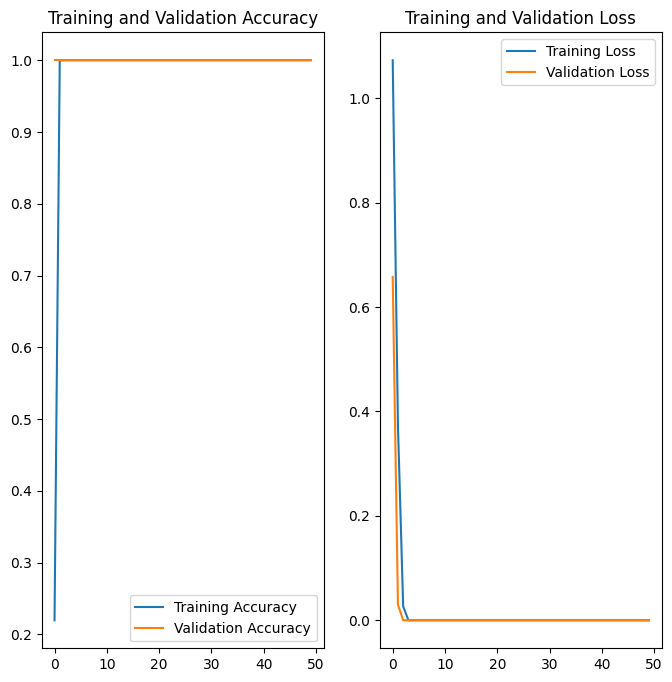

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight-20231106T181901Z-001
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Late_blight-20231106T181901Z-001


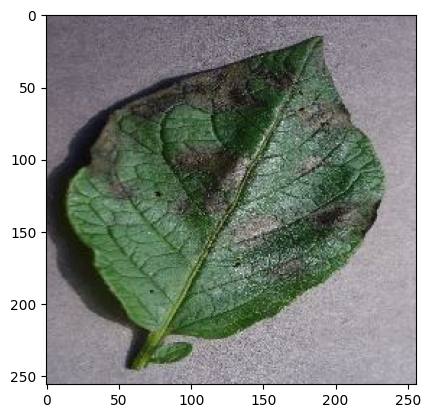

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 160ms/step


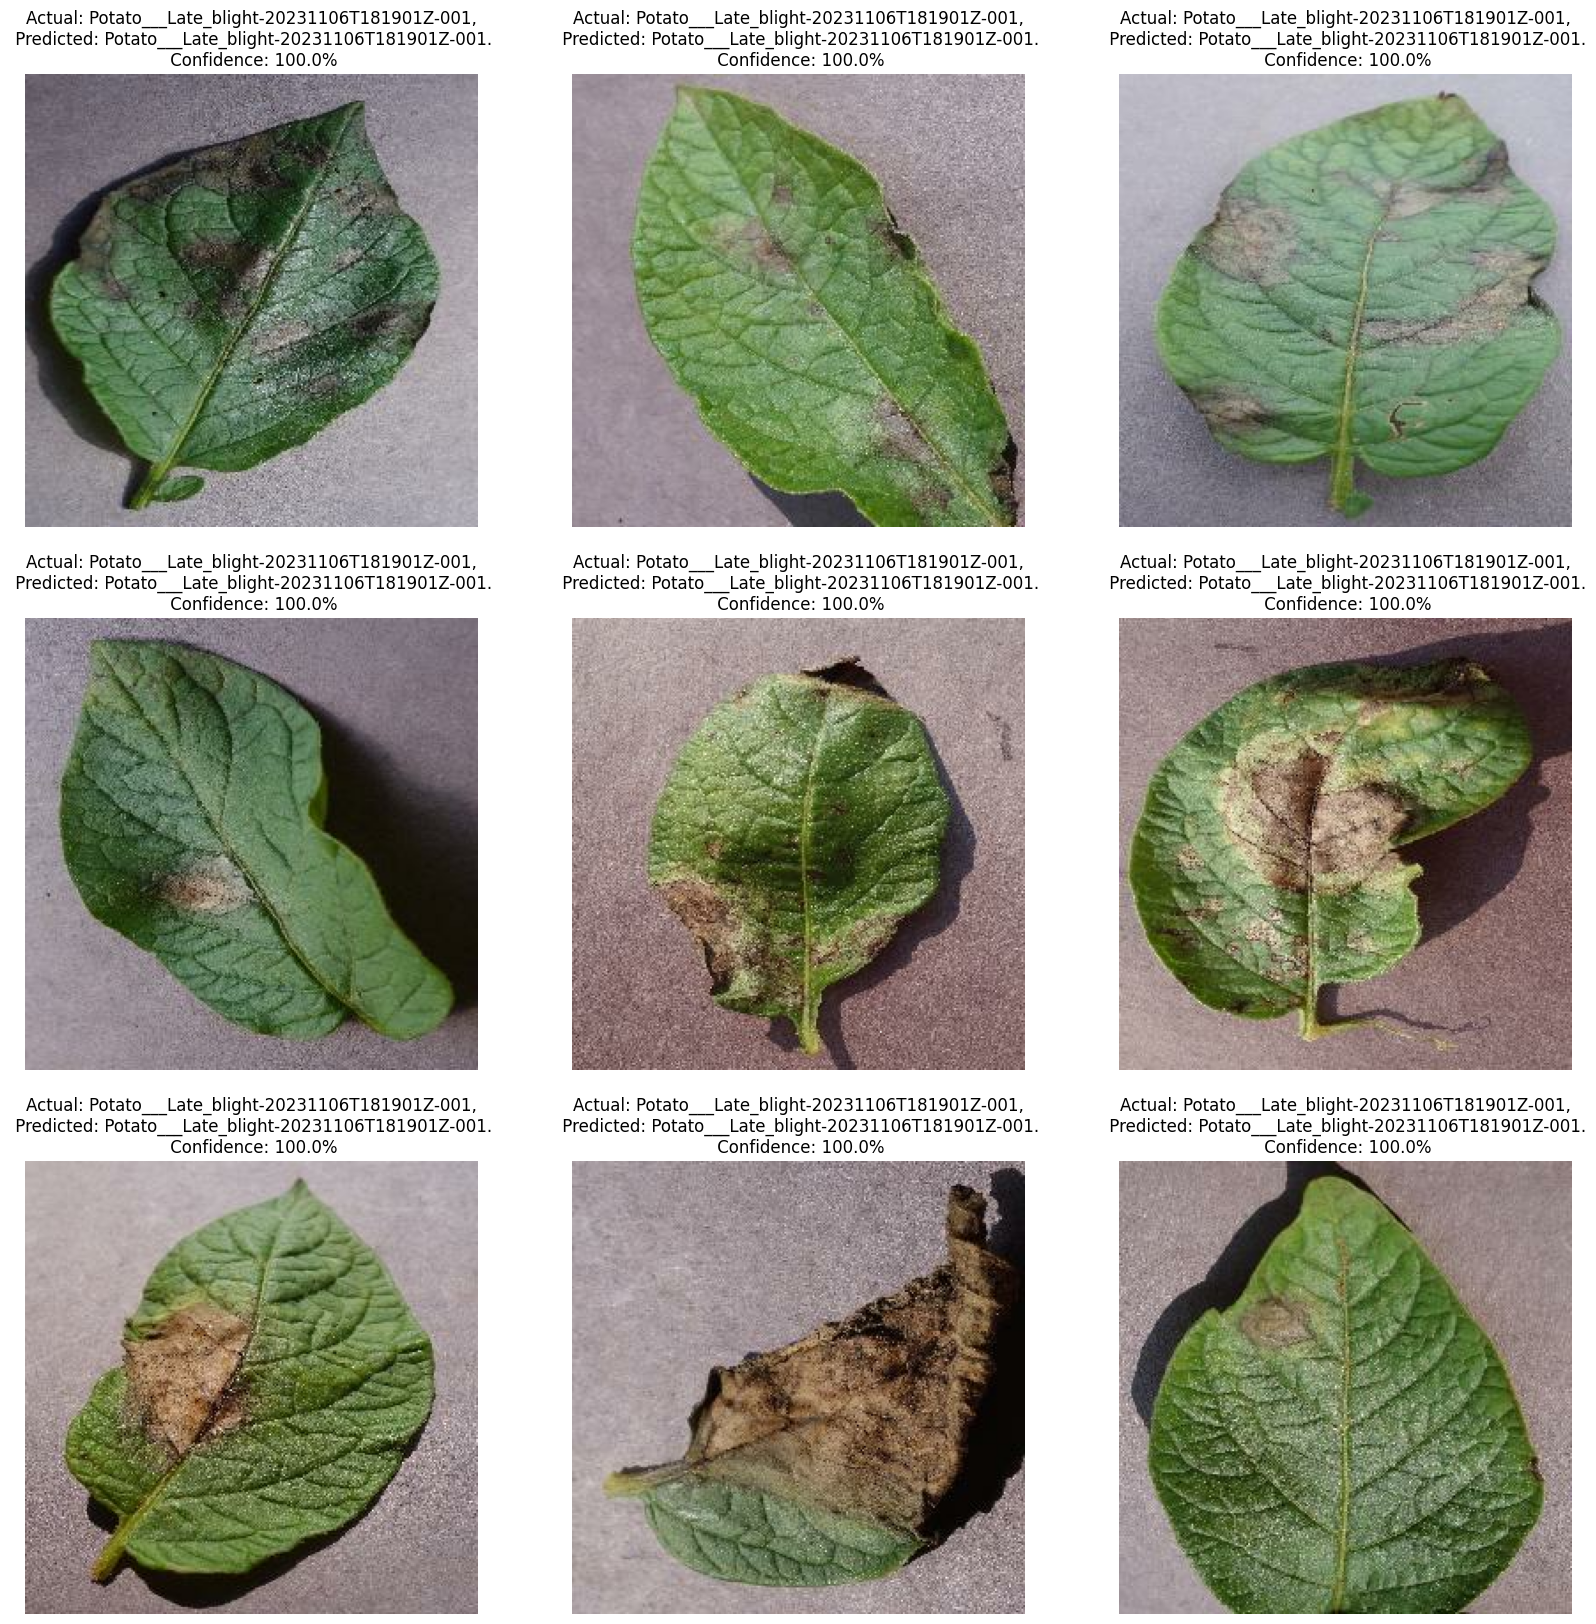

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")